In [22]:
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv2

In [2]:
files = glob.glob("./cathedral/*.jpg")

In [3]:
images = []
for file in files:
    images.append(np.array(Image.open(file)))

In [4]:
### odjęcie i próg

In [5]:
x = (images[0] - images[1])
x[x>=200] = 255
x[x<200] = 0

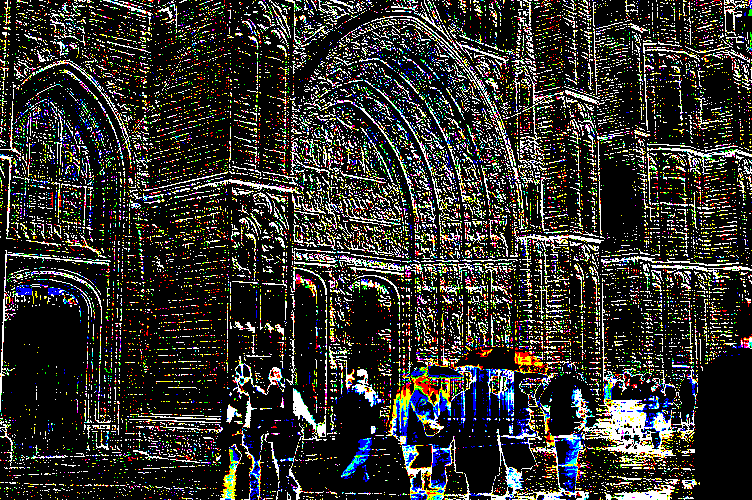

In [6]:
Image.fromarray(x)

In [7]:
### średnia

In [8]:
images = np.array(images)

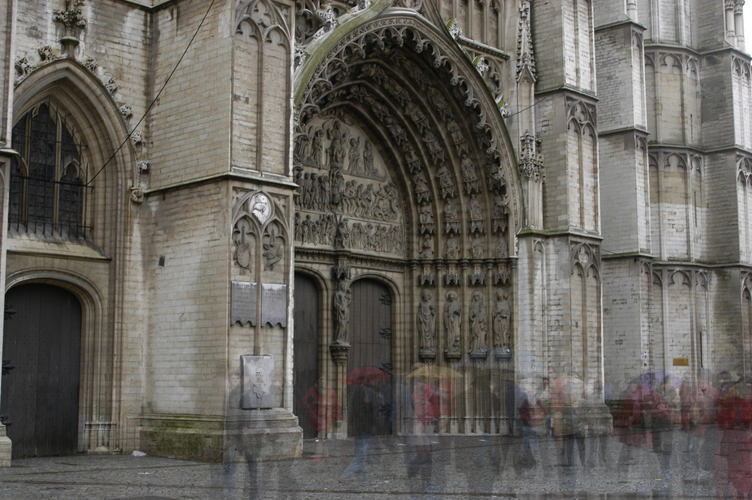

In [9]:
Image.fromarray(np.mean(images, axis=0).astype('uint8'))

In [10]:
### mediana

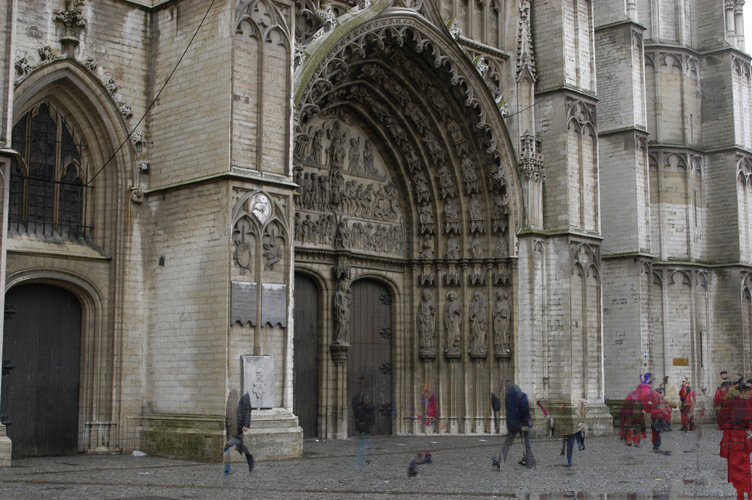

In [11]:
Image.fromarray(np.median(images, axis=0).astype('uint8'))

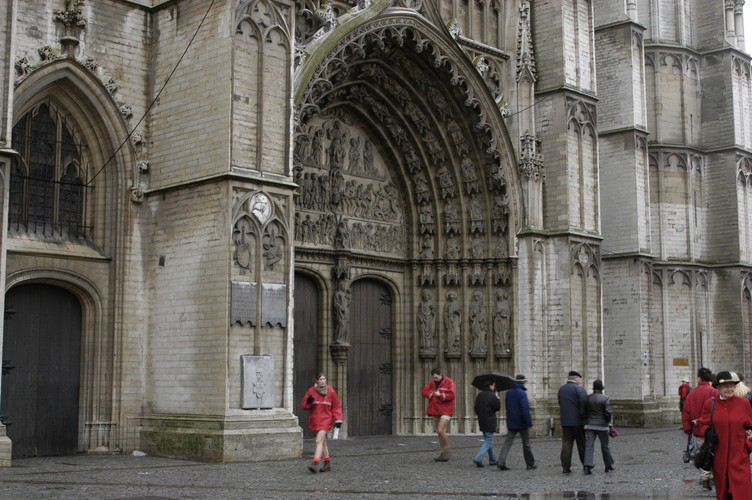

In [12]:
Image.fromarray(images[4])

In [28]:
struct = np.ones((3, 3),np.uint8)

In [36]:
b = images[0].copy()
# set green and red channels to 0
b[:, :, 0] = 0
b[:, :, 2] = 0

N = 50
b[b>=N] = 255
b[b<N] = 0
Image.fromarray(b)




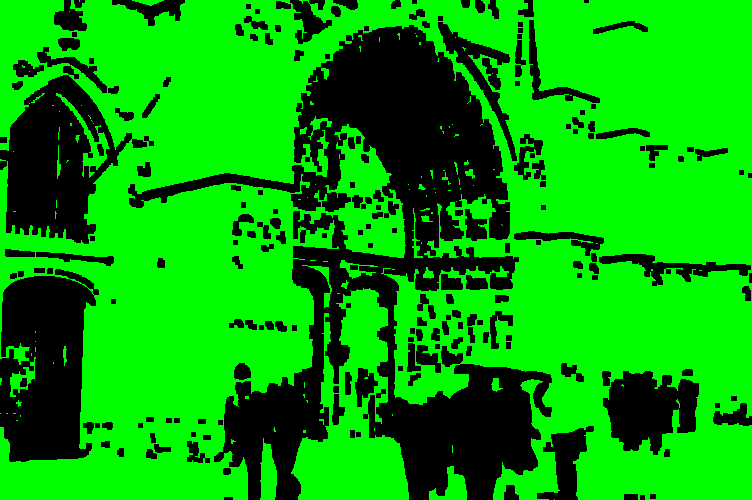

In [30]:
Image.fromarray(cv2.erode(b, struct, iterations=2))

In [49]:
eroded = cv2.erode(b, struct, iterations=2)

In [50]:
eroded[eroded==255] = 1
img = eroded[..., 1] * images[0][..., 1]

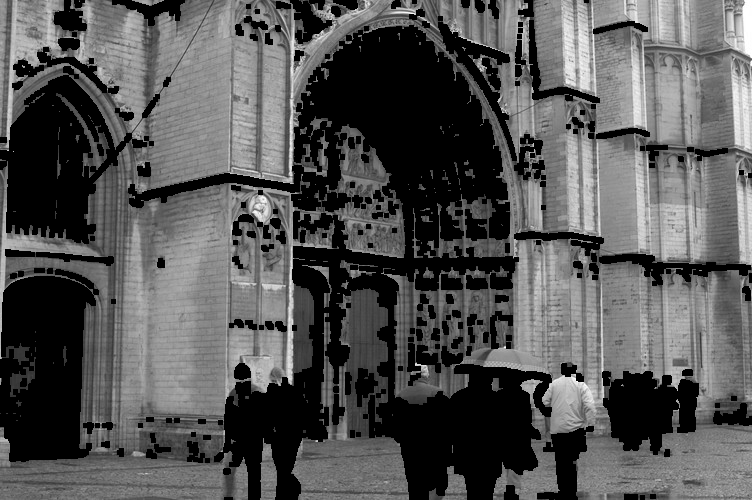

In [42]:
Image.fromarray(img)

# SOLUTION

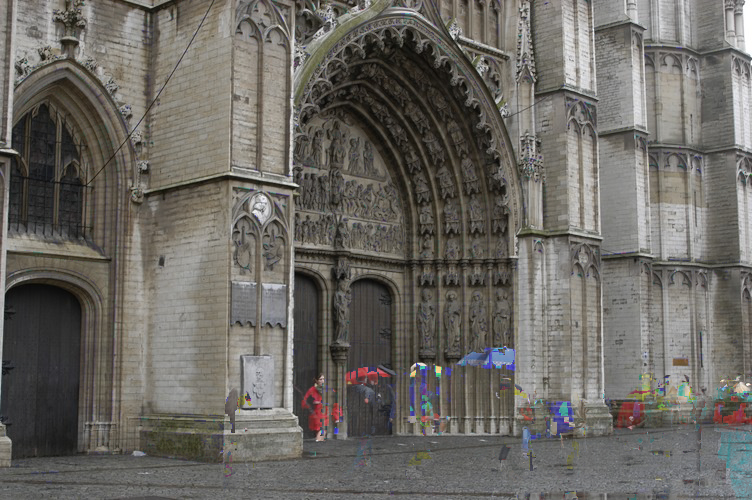

In [86]:
N = 50
struct = np.ones((3, 3),np.uint8)

filteredImage = np.zeros(images.shape)

for i in range(5):
    for channel in [0,1,2]:
        b = images[i].copy()
        # set two of three channels to 0
        if channel == 0:
            b[:, :, 1] = 0
            b[:, :, 2] = 0
        if channel == 1:
            b[:, :, 0] = 0
            b[:, :, 2] = 0
        if channel == 2:
            b[:, :, 0] = 0
            b[:, :, 1] = 0
        
        # Set mask
        b[b>=N] = 255
        b[b<N] = 0
        
        # Erode
        eroded = cv2.erode(b, struct, iterations=2)
        eroded[eroded==255] = 1
        filteredImage[i][..., channel] = eroded[..., channel] * images[i][..., channel]
filteredImage = filteredImage.astype('uint8')
filteredImage = np.median(filteredImage, axis=0).astype('uint8')
# fill empty pixels
filteredImage[filteredImage==0] = np.max(images, axis=0).astype('uint8')[filteredImage==0]

# show image
Image.fromarray(filteredImage)

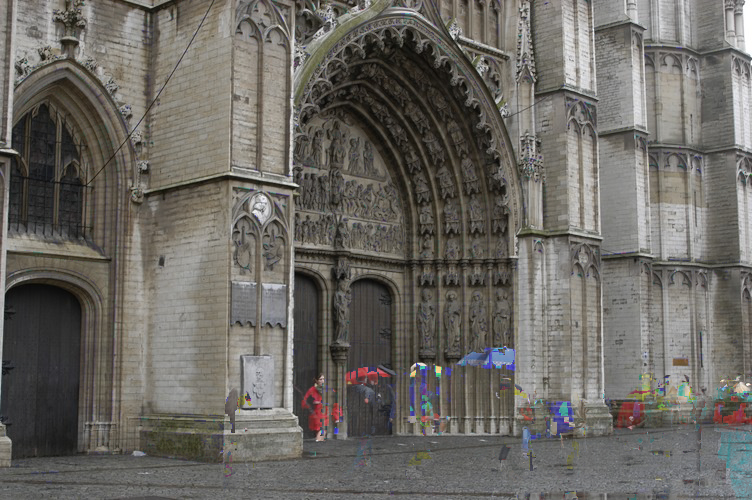

In [87]:
Image.fromarray(filteredImage)

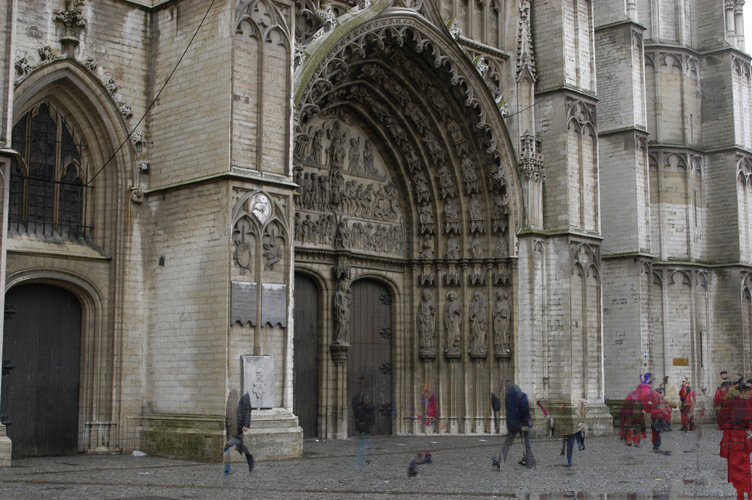

In [79]:
Image.fromarray(np.median(images, axis=0).astype('uint8'))

In [51]:
eroded.shape

(500, 752, 3)

In [35]:
filteredImage

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])